## Exercise 1: PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def species2num(species):
    if (species == "Leptodactylidae"):
        return 0
    elif(species == "Hylidae"):
        return 1
    elif(species == "Dendrobatidae"):
        return 2
    elif(species == "Bufonidae"):
        return 3
    else:
        raise ValueError(species)

In [3]:
x = np.loadtxt('anuran_calls/Frogs_MFCCs.csv', skiprows=1, delimiter=',', usecols=tuple(np.arange(0, 22, 1)), unpack=True)
family = np.loadtxt('anuran_calls/Frogs_MFCCs.csv', skiprows=1, delimiter=',', usecols=22, converters={22: species2num}, encoding="latin1")
x=x.T

In [4]:
size1,size2=x.shape
print(size1)
print(size2)

7195
22


### 1. Preprocess the data by centering the variables and divide them by their standard deviation.

In [5]:
xmean=np.zeros(size2)
xstd=np.zeros(size2)

for i in range(size2):
    xmean[i]=np.mean(x[:,i])
    xstd[i]=np.std(x[:,i])
    
print('means: ',xmean)
print('stds: ',xstd)

x=(x-xmean)/xstd

means:  [ 9.89884547e-01  3.23583775e-01  3.11224209e-01  4.45997131e-01
  1.27046251e-01  9.79389926e-02 -1.39680027e-03 -3.70112470e-04
  1.28213366e-01  5.59979663e-02 -1.15682383e-01  4.33712521e-02
  1.50944749e-01 -3.92436142e-02 -1.01747701e-01  4.20618635e-02
  8.86803056e-02  7.75520691e-03 -4.94738949e-02 -5.32440503e-02
  3.73134641e-02  8.75674940e-02]
stds:  [0.06901075 0.21863809 0.26350892 0.16031643 0.16271106 0.12040344
 0.17139211 0.11629405 0.17899602 0.12709058 0.18677894 0.15597226
 0.20686541 0.15250395 0.18760504 0.119907   0.13804568 0.08472718
 0.0825398  0.09417396 0.07946434 0.12343326]


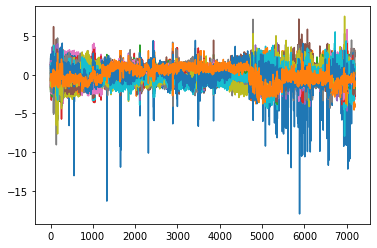

In [6]:
for i in range(size2):
    plt.plot(x[:,i],label=i)

### 2. Compute the Principal Components Analysis on these variables (You can use libraries for solving the eigenvalue problem.). Obtain and plot the eigenvalue spectrum using logscale for the y-axis.

In [7]:
cov=np.cov(x.T)
print(cov)

[[ 1.00013900e+00 -2.64804894e-01 -3.08666618e-01  2.14507043e-02
   1.88794316e-01 -2.18649209e-01 -7.12101224e-02  3.75084683e-02
  -1.90653958e-04  4.96635095e-02 -2.22914853e-02 -5.01606920e-02
   7.24594710e-02  1.40517172e-02 -9.74473505e-02  1.04527540e-02
   1.15739806e-01 -2.01115092e-03 -1.44844702e-01 -8.54811709e-02
   7.23732358e-02  7.93791754e-02]
 [-2.64804894e-01  1.00013900e+00  6.11085531e-01 -4.23842767e-02
  -4.20817083e-01  4.75100794e-02  2.27964182e-01  2.32455173e-01
  -4.05202112e-02 -2.26114754e-01  5.92684316e-02  1.33349023e-01
  -1.65840706e-01 -6.65487796e-03  2.70692473e-01 -5.56034113e-02
  -2.69485312e-01  5.00265363e-02  1.97645752e-01  1.29999036e-01
  -3.62426129e-02 -2.01435159e-01]
 [-3.08666618e-01  6.11085531e-01  1.00013900e+00  2.94071438e-02
  -7.56194094e-01  1.80217046e-01  4.35231656e-01  3.55090496e-02
  -1.87926697e-01 -1.88222260e-01  2.09555795e-01  2.47289090e-01
  -1.83692479e-01 -9.02265557e-02  2.09136496e-01 -2.45048440e-02
  -1.9

In [8]:
eigvals,eigvecs=np.linalg.eigh(cov)

idx=eigvals.argsort()[::-1]   
eigvals=eigvals[idx]
eigvecs=eigvecs[:,idx]

neigvals=eigvals/sum(eigvals) # "normalized" eigenvalues
print(neigvals)
#print(eigvals)

[0.34804736 0.14998307 0.11352623 0.07844775 0.06895934 0.0455804
 0.03865881 0.03669465 0.03057616 0.01788877 0.01466471 0.01287557
 0.01040404 0.00944158 0.00656362 0.00600609 0.00480458 0.00273652
 0.00189965 0.00115468 0.00070257 0.00038386]


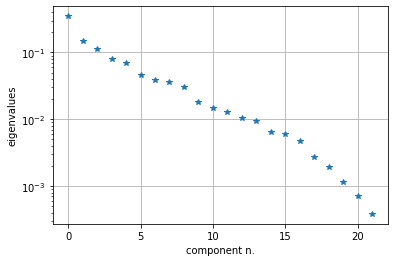

In [9]:
plt.plot(neigvals,'*')
plt.yscale('log')
plt.xlabel('component n.')
plt.ylabel('eigenvalues')
plt.grid(axis='both')

### 3. Project the data in the two first PCs and color it by the family column.

In [10]:
y1=np.zeros(size1)
y2=np.zeros(size1)
for i in range(size1):
    y1[i]=np.sum(x[i,:]*eigvecs[:,0])
    y2[i]=np.sum(x[i,:]*eigvecs[:,1])

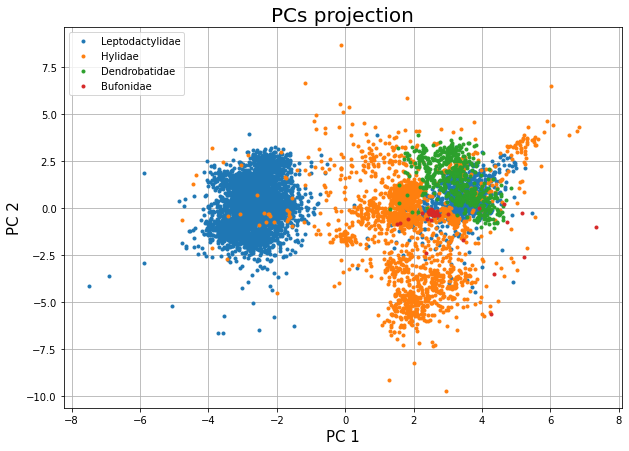

In [13]:
f=plt.figure(figsize=(10,7))

plt.title("PCs projection", fontsize=20)

plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)

plt.plot(y1[np.where(family==0)],y2[np.where(family==0)],'o',label='Leptodactylidae',markersize=3)
plt.plot(y1[np.where(family==1)],y2[np.where(family==1)],'o',label='Hylidae',markersize=3)
plt.plot(y1[np.where(family==2)],y2[np.where(family==2)],'o',label='Dendrobatidae',markersize=3)
plt.plot(y1[np.where(family==3)],y2[np.where(family==3)],'o',label='Bufonidae',markersize=3)


plt.grid(axis='both')
plt.legend()

plt.show()